In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

sys.path.append("reflutils")
import reflutils as ru
from runfile import *

# macro_folder = make_macro_folder()

In [2]:
# Sample_List = ["BareSi", "ZnPc-RT", "C60-ZnPc", "PSS"]
# Energy_dictionary = {
#     "BareSi": [250],
#     "ZnPc-RT": [283.7, 285.1, 286.7, 287, 289],
#     "C60-ZnPc": [283.7, 284, 284.2],
#     "PSS": [250, 278, 280, 281, 282, 283, 285, 288, 290, 293],
# }

# bare_si_loc = (1, 1, .6)
# # znpc_rt_loc = (1,2)
# # c60_znpc_loc = (1,3)

In [3]:
# bare_si, sample_positions = experiment_setup(
#     sample_name=Sample_List[0],
#     energy_list=Energy_dictionary[Sample_List[0]],
#     x_position=bare_si_loc[0],
#     y_position=bare_si_loc[1],
#     z_position=bare_si_loc[2],
#     sample_thickness=250,
# )

In [4]:
# ANGLE_TRANSITIONS

In [5]:
# bare_si_angles = [0, 5, 8, 12, 25, 50]
# bare_si_hos = [7.8, 6.5, 6.5, 6.5, 5.5]
# bare_si_et = [.001, 0.001, 0.01, 0.1, 1]
# bare_si_stitch_params = [
#     energy_setup(angle_transitions=bare_si_angles, hos=bare_si_hos, et=bare_si_et)
# ]
# run_df = run_file(
#     sample_positions, bare_si_stitch_params, Energy_dictionary["BareSi"]
# )
# to_macro(run_df, "BareSi", macro_folder)

# Data Processing

In [56]:
# Energy Sorter
ru.main()  # make asynchronous, waiting function that is ran by scripting

c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\data_sorter.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sourceFile: Path = row[-1]  # type: ignore


In [62]:
%matplotlib inline
pxr = ru.Refl() # make into loader that works with the macro folder to locate the data as it is sorted

c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col].iloc[:meanCutoff] = mean[col]
c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col].iloc[:meanCutoff] = mean[col]
c:\Users\Harlan Heilman\CarbonLab\Refl-Utils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

<Axes: xlabel='Q/G'>

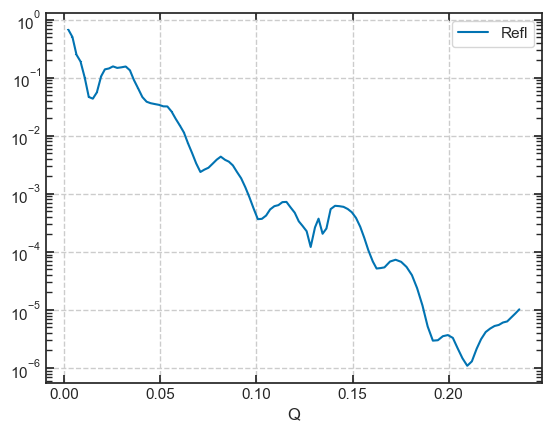

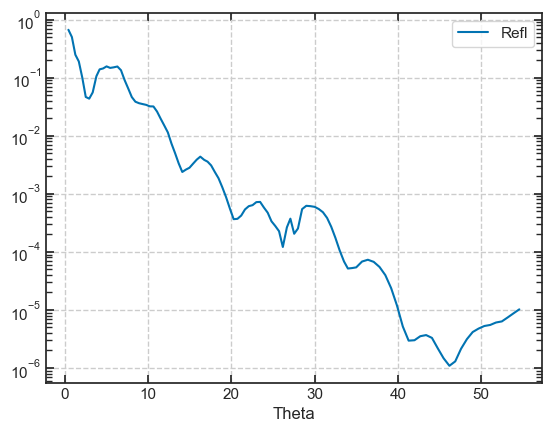

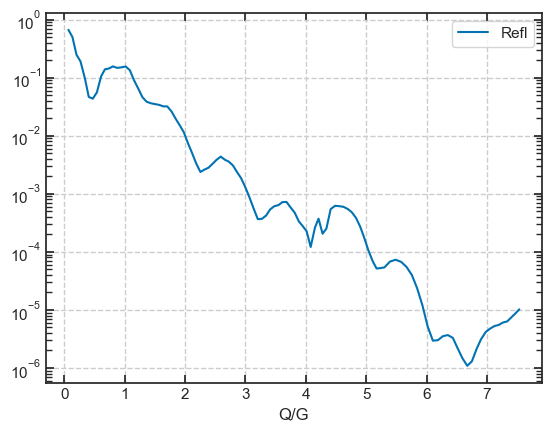

In [63]:
pxr.plot(grid=True)
thickness = 200
G = 2 * np.pi / thickness
pxr.refl["Q/G"] = pxr.refl["Q"] / G
pxr.refl.plot(x="Theta", y="Refl", logy=True, grid=True)
pxr.refl.plot(x="Q/G", y="Refl", logy=True, grid=True)

interactive(children=(IntSlider(value=74, description='i', max=148), Output()), _dom_classes=('widget-interact…

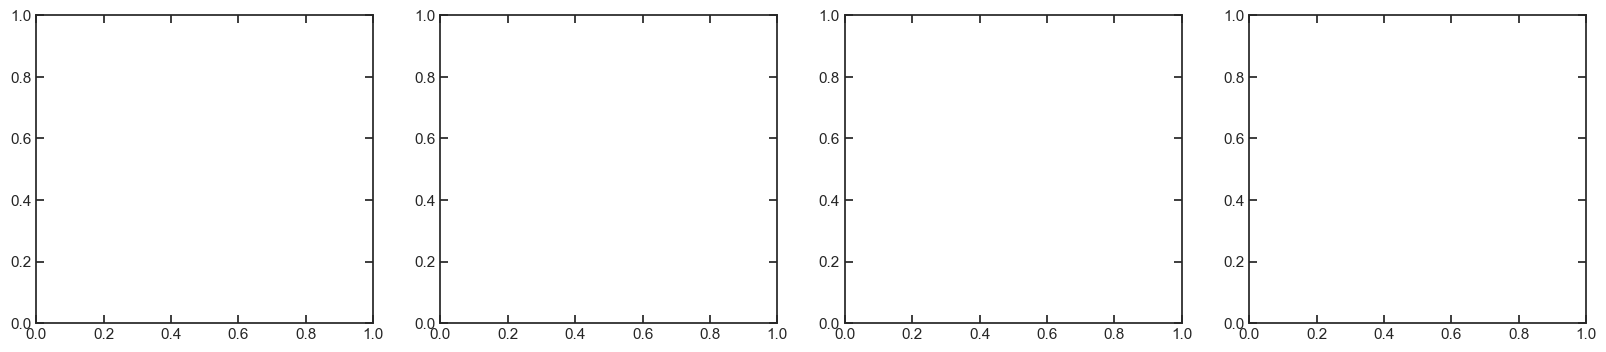

In [59]:
import ipywidgets as widgets


@widgets.interact(i=(0, len(pxr.images)))
def show_image(i):
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    ax[0].imshow(pxr.images["Beam"][i], cmap="coolwarm")
    ax[1].imshow(pxr.images["Dark"][i], cmap="coolwarm")
    ax[2].imshow(pxr.images["Filtered"][i], cmap="coolwarm")
    ax[3].imshow(pxr.images["Images"][i], cmap="coolwarm")